In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import iApi
iApi.headers['api-key']='cc4ff6392e79c9e08c158e5ae5493718'
%matplotlib inline

In [3]:
#unrelated but wanted to save this
from astropy import constants as const
G=const.G.to('kpc3 / (solMass Gyr2)')
print(G.value)
def deltaV(G,M,b,y,r,v):
    return (6*np.pi*G*M*y*b*np.power(r,2))/(v*np.power(np.power(b,2)+np.power(y,2),5/2))
M=2e10
b=100
r=10
y=np.pi*r
v=100
print(deltaV(5e-6,M,b,y,r,v)/v)

4.498502151575286e-06
0.00468012113274


In [47]:
fields=[
    [0,'Coordinates'],
    [0,'Velocities']
]
whichGal=100
js=np.zeros((10,3))
snaps,subs=iApi.getTree(100)
for i in range(10):
    print('step: ',i)
    snap=snaps[i]
    sub=subs[i]
    data=iApi.getGalaxy(sub,fields,snapshot=snap)
    rGas=data[0]
    vGas=data[1]
    subData=iApi.getSubhaloData(sub,snapshot=snap)
    rGas=rGas-subData['SubhaloPos']
    vGas=vGas-subData['SubhaloVel']
    jGas=np.cross(rGas,vGas)
    jTotalGas=np.sum(jGas,axis=0)
    js[i,:]=jTotalGas

step:  0
step:  1
step:  2
step:  3
step:  4
step:  5
step:  6
step:  7
step:  8
step:  9


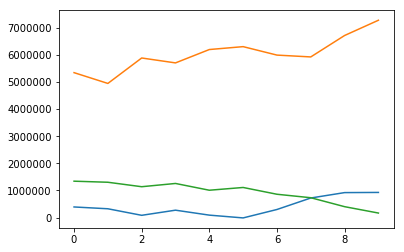

In [50]:
jZ=plt.gca()
jZ.plot(range(10),js[:,0])
jZ.plot(range(10),js[:,1])
jZ.plot(range(10),js[:,2])